# Data


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("final_enriched_for_tableau.csv")

strictness_map = {
    'штраф': 1,
    'обязательные работы': 2,
    'исправительные работы': 3,
    'условное осуждение': 4,
    'ограничение свободы': 5,
    'лишение свободы': 6
}
df['strictness_score'] = df['predicted_result_type'].map(strictness_map)

In [ ]:
df['predicted_amount_bin'] = (df['predicted_amount'] == 'крупный').astype(int)

X = df[['predicted_amount_bin']].fillna(0)
y = df['strictness_score'].fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("Feature importance:", rf.feature_importances_)
print("Classification report:\n", classification_report(y_test, rf.predict(X_test)))

Feature importance: [1.]
Classification report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         9
         1.0       0.45      1.00      0.62      1111
         2.0       0.00      0.00      0.00       150
         3.0       0.00      0.00      0.00         1
         4.0       0.00      0.00      0.00       883
         6.0       0.00      0.00      0.00       301

    accuracy                           0.45      2455
   macro avg       0.08      0.17      0.10      2455
weighted avg       0.20      0.45      0.28      2455



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.utils.multiclass import unique_labels

df_clean = df.dropna(subset=['predicted_amount_bin', 'predicted_result_type'])

le = LabelEncoder()
df_clean['result_type_encoded'] = le.fit_transform(df_clean['predicted_result_type'])

X = df_clean[['predicted_amount_bin']]
y = df_clean['result_type_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

labels_used = sorted(unique_labels(y_test, y_pred).astype(int))
target_names_used = le.inverse_transform(labels_used)

print(classification_report(y_test, y_pred, labels=labels_used, target_names=target_names_used))

<ipython-input-51-d974dec22a1e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['result_type_encoded'] = le.fit_transform(df_clean['predicted_result_type'])
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


                       precision    recall  f1-score   support

исправительные работы       0.00      0.00      0.00         1
      лишение свободы       0.00      0.00      0.00       301
  обязательные работы       0.00      0.00      0.00       150
   условное осуждение       0.00      0.00      0.00       883
                штраф       0.45      1.00      0.62      1111

             accuracy                           0.45      2446
            macro avg       0.09      0.20      0.12      2446
         weighted avg       0.21      0.45      0.28      2446



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Hypothesis 1
The Multinomial Logistic Regression is used for evaluating the influence of the amount on the result type

In [ ]:
import statsmodels.api as sm
import pandas as pd

df_clean = df.dropna(subset=['predicted_result_type', 'predicted_amount_bin'])

categories = ['лишение свободы', 'штраф', 'условное осуждение', 'обязательные работы',
              'исправительные работы', 'ограничение свободы']
df_clean['result_type_cat'] = pd.Categorical(df_clean['predicted_result_type'], categories=categories)

y = df_clean['result_type_cat']
X = sm.add_constant(df_clean[['predicted_amount_bin']])

model = sm.MNLogit(y, X)
result = model.fit()
print(result.summary())

<ipython-input-52-6914c27331e7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['result_type_cat'] = pd.Categorical(df_clean['predicted_result_type'], categories=categories)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 1.159409
         Iterations: 35
                          MNLogit Regression Results                          
Dep. Variable:        result_type_cat   No. Observations:                 9783
Model:                        MNLogit   Df Residuals:                     9773
Method:                           MLE   Df Model:                            5
Date:                Mon, 26 May 2025   Pseudo R-squ.:               0.0004303
Time:                        19:53:48   Log-Likelihood:                -11342.
converged:                      False   LL-Null:                       -11347.
Covariance Type:            nonrobust   LLR p-value:                   0.08213
                result_type_cat=штраф       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     1.3360      0.037     36.507      0.000       1.

Significant finding:
* The only statistically significant effect of predicted_amount_bin = 1 is for the outcome “условное осуждение” (suspended sentence).
* The coefficient is –0.2403, with p-value = 0.004.

That shows us that a **large drug amount significantly reduces the likelihood of receiving a suspended sentence relative to imprisonment**.



Near-significant effect:
* “штраф” (fine)
* Coefficient = –0.1421, p-value = 0.075.

This suggests a **possible decrease in the likelihood of receiving a fine instead of prison for large amounts**.

For all other punishment types, the influence of the amount is **not statistically significant**.

In categories like “ограничение свободы” and “принудительные работы”, model convergence issues and huge standard errors show that there are **too few cases** to draw reliable conclusions.

# Hypothesis 2


In [ ]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

df_prison = df[(df['predicted_result_type'] == 'лишение свободы') &
               (df['log_weight'].notna()) &
               (df['sentence_total_months'].notna())].copy()

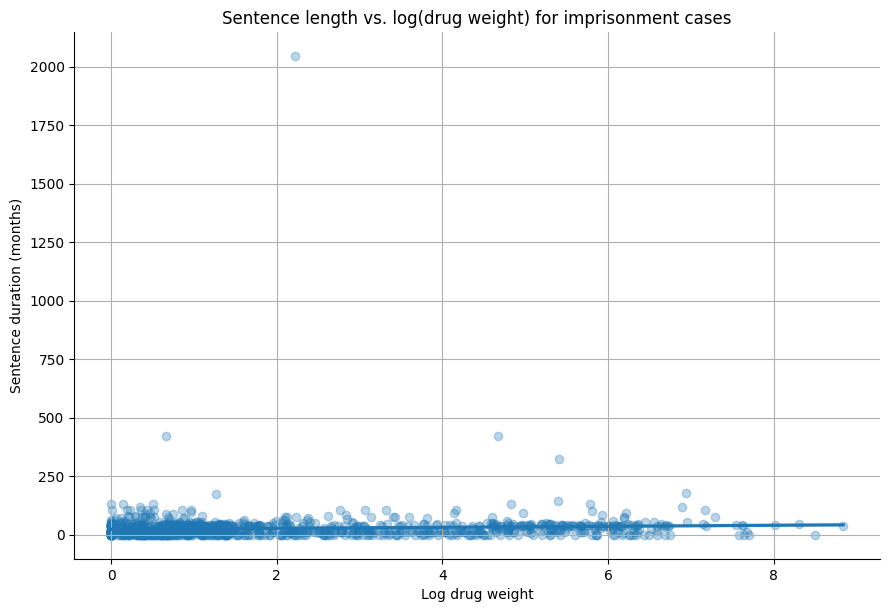

In [ ]:
sns.lmplot(data=df_prison, x='log_weight', y='sentence_total_months',
           height=6, aspect=1.5, scatter_kws={'alpha':0.3})
plt.title("Sentence length vs. log(drug weight) for imprisonment cases")
plt.xlabel("Log drug weight")
plt.ylabel("Sentence duration (months)")
plt.grid(True)
plt.show()

In [ ]:
X = sm.add_constant(df_prison['log_weight'])
y = df_prison['sentence_total_months']

model = sm.OLS(y, X).fit()
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     sentence_total_months   R-squared:                       0.004
Model:                               OLS   Adj. R-squared:                  0.003
Method:                    Least Squares   F-statistic:                     5.207
Date:                   Mon, 26 May 2025   Prob (F-statistic):             0.0227
Time:                           19:53:49   Log-Likelihood:                -6736.1
No. Observations:                   1203   AIC:                         1.348e+04
Df Residuals:                       1201   BIC:                         1.349e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.2833 

* The coefficient is positive and **statistically significant** (p = 0.023). This means that, among imprisoned individuals, **higher drug weight is associated with longer prison sentences**. Specifically, for each unit increase in log drug weight, the sentence increases by approximately 2.15 months on average.
*	However, the **R² is very low (0.004)**, which suggests that drug weight **explains only a small portion of the variation** in sentence lengths.	Other factors (e.g. prior convictions, mitigating/aggravating circumstances, substance type, etc.) likely play a much larger role.

# Hypothesis 3

In [2]:
df = pd.read_csv('clean_noresult_final.csv')
df = df[['gender_group', 'predicted_result_type']]
df = df[df['gender_group'].isin(['муж', 'жен'])]
soft_types = ['штраф', 'условное осуждение']
df['soft_punishment'] = df['predicted_result_type'].apply(lambda x: 1 if x in soft_types else 0)
df['female'] = (df['gender_group'] == 'жен').astype(int)

X = sm.add_constant(df['female'])
y = df['soft_punishment']

model = sm.Logit(y, X).fit()
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.483994
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:        soft_punishment   No. Observations:                 9257
Model:                          Logit   Df Residuals:                     9255
Method:                           MLE   Df Model:                            1
Date:                Tue, 27 May 2025   Pseudo R-squ.:               0.0001143
Time:                        11:32:20   Log-Likelihood:                -4480.3
converged:                       True   LL-Null:                       -4480.8
Covariance Type:            nonrobust   LLR p-value:                    0.3116
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4517      0.028     52.416      0.000       1.397       1.506
female         0.0987      0.

According to the regression results **(n = 9257)**, the coefficient for female turned out to be positive **(0.0987)**, which indicates a slightly higher probability of assigning mild punishment to women compared to men. However, this effect is not statistically significant **(p = 0.316)**, and therefore, the data obtained do not allow us to confirm the hypothesis about the influence of gender on the severity of punishment.

Thus, when considering only one factor — the sex of the accused — the differences in the type of punishment imposed between men and women were not revealed at the level of statistical significance.


The absence of a significant relationship between gender and type of punishment in the simplified model does not mean that there is no such influence. Probably, gender can have an effect, but only in combination with other factors, such as the weight and type of substance, the presence of mitigating or aggravating circumstances, criminal record, region, etc.